# Primer Parcial Módulo 3 generación 20

Se tiene una tabla transaccional, que contiene las compras realizadas por los clientes, a nivel elemento del ticket. La intención de este negocio, es diseñar un programa de lealtad por lo cual, necesita identificar diversos segmentos de sus clientes. Como esto es un primer ensayo de este requerimiento, la compañía requiere que se identifique de forma adecuada el número de segmentos que podría crear, dependiendo del comportamiento de sus clientes. 

Tomando esto en cuenta, emplee las técnicas vistas en clase, para proponer una alternativa para la compañía, realizando un análisis exploratorio de los datos encontrados para los clientes, el comportamiento de estos, la propuesta de subgrupos y los resultados obtenidos. Así como el planteamiento de cuál sería la base para este programa de lealtad (es decir, ¿cuántos conjuntos son?, ¿cuál fue la técnica empleada para la selección de dichos conjuntos?, ¿que hallazgos se tienen respecto al comportamiento de sus clientes?, etc...). 

El formato de entrega de este análisis, será una presentación de power point, que explique el proceso realizado y el porque de las elecciones del científico de datos.  La presentación no deberá de ser mayor a 13 láminas (sin considerar portada e índice) y será entregada en formato pdf, contando el desarrollo de este análisis y explicando los resultados, así como el planteamiento de las ideas propuestas por el científico de datos. Adicional a este pdf, se espera la entrega de su código en formato .pdf para que se pueda leer, sin necesidad de ejecución, pero el archivo .pdf deberá contener el código ya ejecutado.

A continuación, presentamos un diccionario de datos:

{'InvoiceNo': 'Número de Ticket',
'StockCode': 'Código del producto en almacén',
'Description': 'Descripción del Producto',
'Quantity': 'Cantidad del producto comprarda',
'InvoiceDate': 'Timestamp del ticket',
'UnitPrice': 'Precio unitario del producto',
'CustomerID': 'Id del cliente',
'Country': 'País de donde proviene la compra'}

Notas: un negativo en la transacción implicaría que es una devolución, del producto o bien, del valor.

Explore su creatividad, y trate de expandir el uso de sus conocimientos. Es válido preguntar respecto a la información y un poco de validación creativa, pero de ahí en fuera, el alumno está preparado para responder este tipo de preguntas de negocio y crear una solución como la que se solicita. 

Un ejemplo del flujo podría ser el siguiente:

* 1. Exploración e identificación de los datos y la unidad muestral requerida.
* 2. Diseño y selección de las variables a observar para crear la segmentación.
* 3. Representación de los espacios en una proyección.
* 4. Propuestas de algoritmos y segmentos.
* 5. Ajuste de los algoritmos.
* 6. Evaluación de los resultados (análisis del sentido de los subgrupos).
* 7. Nombrar los subgrupos con base a lo encontrado en cada uno.
* Ejemplo: En el caso de los clubes, pudimos haber nombrado al grupo de alto nivel de transacciones como los clubes de super estrellas, pues veíamos que además de que sus compras eran altas, también el monto de sus compras lo era. Esto gracias a la variable de fichaje estrella. Además, veíamos que sus transacciones relativas estaban orientadas a un marco negativo ligero. Pues compraban más de lo que vendían. 
* 8. Realizar el análisis de negocio e identificar los beneficios de aplicar el programa de lealtad. Alguna propuesta de programa de recompensas basado en el nivel de lealtad del cliente. 
* 9. Realizar la presentación de negocio con esta información.

In [57]:
import pandas as pd
import os
#librerias 
import numpy as np
import pandas as pd 
import re
import emoji
import unicodedata
import seaborn as sns
from sklearn.model_selection import train_test_split # pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from PIL import Image 
import cufflinks as cf
import stylecloud
from stylecloud import gen_stylecloud 
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
data = pd.read_csv('Retail Transactions.csv', encoding='latin')
import seaborn as sns
data
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN#Reduccion Dimensionalidad
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering


# Ingieneria de vairables 

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [59]:
data['total']=data['Quantity']*data['UnitPrice']
quantile=data['total'].quantile(.90)

In [60]:
# creando una nueva columna con los totales

data['devolucion']=data['total'].map(lambda x: 1 if x<0 else 0)
data['compras_caras']=data['total'].map(lambda x: 1 if x>quantile else 0)

data

InvoiceNo StockCode                          Description  Quantity   
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6  \
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  total   
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  15.30  \
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  20.34   
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  22.00   
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  20.34   
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  20.34   
...                 ...        ...         ...             ...    ...   
541904  12/9/2011 12:50       0.85     12680.0          France  10.20   
541905  12/9/2011 12:50       2.10     12680.0          France  12.60   
541906  12/9/2011 12:50       4.15     12680.0          France  16.60   
541907  12/9/2011 12:50       4.15     12680.0          France  16.60   
541908  12/9/2011 12:50       4.95     12680.0          France  14.85   

        devolucion  compras_caras  
0                0              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
541904           0              0  
541905           0              0  
541906           0              0  
541907           0              0  
541908           0              0  

[541909 rows x 11 columns]

In [61]:
# variables de tiempo
data['year']=pd.to_datetime(data['InvoiceDate']).dt.year
data['month']=pd.to_datetime(data['InvoiceDate']).dt.month
data['day']=pd.to_datetime(data['InvoiceDate']).dt.dayofweek
data['hour']=pd.to_datetime(data['InvoiceDate']).dt.hour
data['is_weekend']=pd.to_datetime(data['InvoiceDate']).dt.dayofweek.isin([5,6])*1


In [62]:
agg_col = 'CustomerID'
agg_funcs = {
    'InvoiceNo': 'count',
    'devolucion': 'sum',
    'total': ['sum', 'min', 'max', 'mean','median' ],
    'UnitPrice': ['sum', 'min', 'max', 'mean','median'],
    'Quantity': ['sum', 'min', 'max', 'mean','median'],
    'compras_caras':'sum',
    'day':[ 'min', 'max', 'mean','median' ],
    'month':[ 'min', 'max', 'mean','median' ],
    'hour':[ 'min', 'max', 'mean','median' ],
     'is_weekend':[ 'sum' ]
    
}

df = data.groupby(agg_col).agg(agg_funcs)

In [63]:
df

InvoiceNo devolucion    total                                  
               count        sum      sum       min       max       mean   
CustomerID                                                                
12346.0            2          1     0.00 -77183.60  77183.60   0.000000  \
12347.0          182          0  4310.00      5.04    249.60  23.681319   
12348.0           31          0  1797.24     13.20    240.00  57.975484   
12349.0           73          0  1757.55      6.64    300.00  24.076027   
12350.0           17          0   334.40      8.50     40.00  19.670588   
...              ...        ...      ...       ...       ...        ...   
18280.0           10          0   180.60     14.85     23.70  18.060000   
18281.0            7          0    80.82      5.04     16.95  11.545714   
18282.0           13          1   176.60     -1.45     25.50  13.584615   
18283.0          756          0  2094.88      0.29     20.80   2.771005   
18287.0           70          0  1837.28      5.04     87.00  26.246857   

                  UnitPrice                ...    day month                  
           median       sum   min     max  ... median   min max       mean   
CustomerID                                 ...                               
12346.0      0.00      2.08  1.04    1.04  ...    1.0     1   1   1.000000  \
12347.0     17.00    481.21  0.25   12.75  ...    1.0     1  12   7.598901   
12348.0     41.76    178.71  0.29   40.00  ...    3.0     1  12   8.290323   
12349.0     17.70    605.10  0.42  300.00  ...    0.0    11  11  11.000000   
12350.0     19.80     65.30  0.85   40.00  ...    2.0     2   2   2.000000   
...           ...       ...   ...     ...  ...    ...   ...  ..        ...   
18280.0     17.70     47.65  2.55    9.95  ...    0.0     3   3   3.000000   
18281.0     15.30     39.36  0.42   16.95  ...    6.0     6   6   6.000000   
18282.0     13.50     62.68  0.29   12.75  ...    4.0     8  12   9.538462   
18283.0      2.08   1220.93  0.29   15.95  ...    3.0     1  12   7.279101   
18287.0     18.72    104.55  0.29    8.50  ...    2.0     5  10   7.928571   

                  hour                       is_weekend  
           median  min max       mean median        sum  
CustomerID                                               
12346.0       1.0   10  10  10.000000   10.0          0  
12347.0       8.0    8  15  12.192308   12.0          0  
12348.0      12.0   10  19  15.225806   19.0          3  
12349.0      11.0    9   9   9.000000    9.0          0  
12350.0       2.0   16  16  16.000000   16.0          0  
...           ...  ...  ..        ...    ...        ...  
18280.0       3.0    9   9   9.000000    9.0          0  
18281.0       6.0   10  10  10.000000   10.0          7  
18282.0       8.0   11  15  12.384615   13.0          0  
18283.0       7.0   10  19  13.685185   13.0         45  
18287.0      10.0    9  10   9.957143   10.0         29  

[4372 rows x 31 columns]

In [64]:
df.describe()

InvoiceNo   devolucion          total                                 
             count          sum            sum            min            max   
count  4372.000000  4372.000000    4372.000000    4372.000000    4372.000000  \
mean     93.053294     2.036825    1898.459701     -86.425754     185.179522   
std     232.471608     7.340449    8219.345141    2876.398935    2881.283699   
min       1.000000     0.000000   -4287.630000 -168469.600000   -4287.630000   
25%      17.000000     0.000000     293.362500     -11.500000      31.800000   
50%      42.000000     0.000000     648.075000       0.790000      52.020000   
75%     102.000000     1.000000    1611.725000       6.960000     102.000000   
max    7983.000000   226.000000  279489.020000    3861.000000  168469.600000   

                                    UnitPrice                             ...   
              mean       median           sum          min           max  ...   
count  4372.000000  4372.000000   4372.000000  4372.000000   4372.000000  ...  \
mean     28.839013    24.278949    322.008226     3.120136     39.591160  ...   
std     127.323926   133.746716   1284.783098    78.601453    622.661361  ...   
min   -4287.630000 -4287.630000      0.000000     0.000000      0.000000  ...   
25%      10.985960     8.296250     52.865000     0.210000      8.250000  ...   
50%      16.918616    15.300000    130.095000     0.390000     12.750000  ...   
75%      23.542941    17.700000    302.332500     0.650000     16.950000  ...   
max    3861.000000  3861.000000  41376.330000  4287.630000  38970.000000  ...   

               day        month                                          
            median          min          max         mean       median   
count  4372.000000  4372.000000  4372.000000  4372.000000  4372.000000  \
mean      2.548490     5.386093     9.533623     7.537233     7.624428   
std       1.686558     3.624451     2.960584     2.703681     3.046945   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     2.000000     9.000000     5.918261     5.000000   
50%       2.000000     5.000000    11.000000     7.660769     8.000000   
75%       3.000000     9.000000    12.000000     9.877675    10.000000   
max       6.000000    12.000000    12.000000    12.000000    12.000000   

              hour                                          is_weekend  
               min          max         mean       median          sum  
count  4372.000000  4372.000000  4372.000000  4372.000000  4372.000000  
mean     11.080284    14.340576    12.592770    12.563358    14.464090  
std       2.303590     2.468093     1.879459     2.113674    50.190216  
min       6.000000     7.000000     7.000000     7.000000     0.000000  
25%       9.000000    13.000000    11.456028    11.000000     0.000000  
50%      11.000000    15.000000    12.494817    12.000000     0.000000  
75%      13.000000    16.000000    13.903610    14.000000     6.000000  
max      20.000000    20.000000    20.000000    20.000000  1150.000000  

[8 rows x 31 columns]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (InvoiceNo, count)    4372 non-null   int64  
 1   (devolucion, sum)     4372 non-null   int64  
 2   (total, sum)          4372 non-null   float64
 3   (total, min)          4372 non-null   float64
 4   (total, max)          4372 non-null   float64
 5   (total, mean)         4372 non-null   float64
 6   (total, median)       4372 non-null   float64
 7   (UnitPrice, sum)      4372 non-null   float64
 8   (UnitPrice, min)      4372 non-null   float64
 9   (UnitPrice, max)      4372 non-null   float64
 10  (UnitPrice, mean)     4372 non-null   float64
 11  (UnitPrice, median)   4372 non-null   float64
 12  (Quantity, sum)       4372 non-null   int64  
 13  (Quantity, min)       4372 non-null   int64  
 14  (Quantity, max)       4372 non-null   int64  
 15  (Quantity, mean) 

In [66]:
df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
df

InvoiceNo_count  devolucion_sum  total_sum  total_min  total_max   
CustomerID                                                                     
12346.0                   2               1       0.00  -77183.60   77183.60  \
12347.0                 182               0    4310.00       5.04     249.60   
12348.0                  31               0    1797.24      13.20     240.00   
12349.0                  73               0    1757.55       6.64     300.00   
12350.0                  17               0     334.40       8.50      40.00   
...                     ...             ...        ...        ...        ...   
18280.0                  10               0     180.60      14.85      23.70   
18281.0                   7               0      80.82       5.04      16.95   
18282.0                  13               1     176.60      -1.45      25.50   
18283.0                 756               0    2094.88       0.29      20.80   
18287.0                  70               0    1837.28       5.04      87.00   

            total_mean  total_median  UnitPrice_sum  UnitPrice_min   
CustomerID                                                           
12346.0       0.000000          0.00           2.08           1.04  \
12347.0      23.681319         17.00         481.21           0.25   
12348.0      57.975484         41.76         178.71           0.29   
12349.0      24.076027         17.70         605.10           0.42   
12350.0      19.670588         19.80          65.30           0.85   
...                ...           ...            ...            ...   
18280.0      18.060000         17.70          47.65           2.55   
18281.0      11.545714         15.30          39.36           0.42   
18282.0      13.584615         13.50          62.68           0.29   
18283.0       2.771005          2.08        1220.93           0.29   
18287.0      26.246857         18.72         104.55           0.29   

            UnitPrice_max  ...  day_median  month_min  month_max  month_mean   
CustomerID                 ...                                                 
12346.0              1.04  ...         1.0          1          1    1.000000  \
12347.0             12.75  ...         1.0          1         12    7.598901   
12348.0             40.00  ...         3.0          1         12    8.290323   
12349.0            300.00  ...         0.0         11         11   11.000000   
12350.0             40.00  ...         2.0          2          2    2.000000   
...                   ...  ...         ...        ...        ...         ...   
18280.0              9.95  ...         0.0          3          3    3.000000   
18281.0             16.95  ...         6.0          6          6    6.000000   
18282.0             12.75  ...         4.0          8         12    9.538462   
18283.0             15.95  ...         3.0          1         12    7.279101   
18287.0              8.50  ...         2.0          5         10    7.928571   

            month_median  hour_min  hour_max  hour_mean  hour_median   
CustomerID                                                             
12346.0              1.0        10        10  10.000000         10.0  \
12347.0              8.0         8        15  12.192308         12.0   
12348.0             12.0        10        19  15.225806         19.0   
12349.0             11.0         9         9   9.000000          9.0   
12350.0              2.0        16        16  16.000000         16.0   
...                  ...       ...       ...        ...          ...   
18280.0              3.0         9         9   9.000000          9.0   
18281.0              6.0        10        10  10.000000         10.0   
18282.0              8.0        11        15  12.384615         13.0   
18283.0              7.0        10        19  13.685185         13.0   
18287.0             10.0         9        10   9.957143         10.0   

            is_weekend_sum  
CustomerID                  
12346.0                 

In [67]:
data['compra'] = 1
compras_por_mes = data.pivot_table(index='CustomerID', columns=['year', 'month'], values='compra', aggfunc='sum', fill_value=0)
compras_por_mes.columns = [f'compras_{año}_{mes:02}' for año, mes in compras_por_mes.columns]
compras_por_mes



compras_2010_12  compras_2011_01  compras_2011_02   
CustomerID                                                      
12346.0                   0                2                0  \
12347.0                  31               29                0   
12348.0                  17                6                0   
12349.0                   0                0                0   
12350.0                   0                0               17   
...                     ...              ...              ...   
18280.0                   0                0                0   
18281.0                   0                0                0   
18282.0                   0                0                0   
18283.0                   0              102               30   
18287.0                   0                0                0   

            compras_2011_03  compras_2011_04  compras_2011_05   
CustomerID                                                      
12346.0                   0                0                0  \
12347.0                   0               24                0   
12348.0                   0                5                0   
12349.0                   0                0                0   
12350.0                   0                0                0   
...                     ...              ...              ...   
18280.0                  10                0                0   
18281.0                   0                0                0   
18282.0                   0                0                0   
18283.0                   0               56               44   
18287.0                   0                0               29   

            compras_2011_06  compras_2011_07  compras_2011_08   
CustomerID                                                      
12346.0                   0                0                0  \
12347.0                  18                0               22   
12348.0                   0                0                0   
12349.0                   0                0                0   
12350.0                   0                0                0   
...                     ...              ...              ...   
18280.0                   0                0                0   
18281.0                   7                0                0   
18282.0                   0                0                8   
18283.0                 111               57                0   
18287.0                   0                0                0   

            compras_2011_09  compras_2011_10  compras_2011_11  compras_2011_12  
CustomerID                                                                      
12346.0                   0                0                0                0  
12347.0                   0               47                0               11  
12348.0                   3                0                0                0  
12349.0                   0                0               73                0  
12350.0                   0                0                0                0  
...                     ...              ...              ...              ...  
18280.0                   0                0                0                0  
18281.0                   0                0                0                0  
18282.0                   0                0                0                5  
18283.0                  47               40              219               50  
18287.0                   0               41                0                0  

[4372 rows x 13 columns]

In [68]:
"""df=df.merge(compras_por_mes, left_index=True, right_index=True)
for i in compras_por_mes.columns:
    df[i]=df[i]/df['InvoiceNo_count']"""

"df=df.merge(compras_por_mes, left_index=True, right_index=True)\nfor i in compras_por_mes.columns:\n    df[i]=df[i]/df['InvoiceNo_count']"

In [69]:
df['weekend_rate']=df['is_weekend_sum']/df['InvoiceNo_count']

# EDA datos sucios

In [70]:
# EDA
import plotly.express as px
for variable in df.columns:
    fig = px.histogram(df, x=variable, title=f"{variable}'s histogram")
    fig.update_layout(
        autosize=False,
        width=500,  # Ajusta el ancho según tus necesidades
        height=400,  # Ajusta la altura según tus necesidades
    )
    fig.show()

In [71]:
#Crea la matriz de scatter  
#import seaborn as sns
#sns.set(style='ticks')
#sns.pairplot(df)
#plt.show()

# Limpieza

In [72]:
# remocion de variables con alto contenido de missings (mayor al 10%)
def remover_variables_nulas(df, umbral=0.10):
    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = df.isnull().mean()

    # Obtiene las variables que superan el umbral de valores nulos
    variables_a_remover = porcentaje_nulos[porcentaje_nulos > umbral].index.tolist()

    # Elimina las variables del DataFrame
    df.drop(variables_a_remover, axis=1, inplace=True)
    print(f"las variables que se removieron son: {variables_a_remover}")

In [73]:
remover_variables_nulas(df)

las variables que se removieron son: []


In [74]:
#Validamos ahora para inf variables
inf_values = np.isinf(df).sum().items()
inf_variables = [var for var, n_inf in inf_values if n_inf > 0]
inf_variables # no hay variables con infinitos

[]

In [75]:
corr_matrix = df.corr()
ls_checked = []
ls_correlated = []
for col in corr_matrix.columns:
    ls_checked.append(col)
    ls_correlated += corr_matrix[(corr_matrix[col] >= 0.90) & (~corr_matrix.index.isin(ls_checked))].index.tolist()
ls_correlated = list(set(ls_correlated))
ls_correlated = [variable for variable in ls_correlated]
print(f"las variables con correlacion de 0.999 con respecto a otra son: {ls_correlated}") #  tenemos 1 varibale con correlaicon 0.999 respecto a otra, se eliminara
df=df.drop(ls_correlated,axis=1)

las variables con correlacion de 0.999 con respecto a otra son: ['compras_caras_sum', 'Quantity_max', 'Quantity_sum', 'Quantity_min', 'hour_median', 'UnitPrice_median', 'Quantity_median', 'total_median', 'day_median', 'month_median']


In [76]:
def remover_variables_unarias(df, umbral=0.9999):
    # Calcula el valor más común en cada columna
    valores_comunes = df.mode().iloc[0]

    # Obtiene las variables que superan el umbral de igualdad
    variables_a_remover = []
    for columna in df.columns:
        valor_comun = valores_comunes[columna]
        porcentaje_igual = (df[columna] == valor_comun).mean()
        if porcentaje_igual > umbral:
            variables_a_remover.append(columna)

    # Elimina las variables del DataFrame
    print(f"variables unarias a remover: {variables_a_remover}")
    df.drop(variables_a_remover, axis=1, inplace=True)

In [77]:
remover_variables_unarias(df, umbral=0.90)
df

variables unarias a remover: []


InvoiceNo_count  devolucion_sum  total_sum  total_min  total_max   
CustomerID                                                                     
12346.0                   2               1       0.00  -77183.60   77183.60  \
12347.0                 182               0    4310.00       5.04     249.60   
12348.0                  31               0    1797.24      13.20     240.00   
12349.0                  73               0    1757.55       6.64     300.00   
12350.0                  17               0     334.40       8.50      40.00   
...                     ...             ...        ...        ...        ...   
18280.0                  10               0     180.60      14.85      23.70   
18281.0                   7               0      80.82       5.04      16.95   
18282.0                  13               1     176.60      -1.45      25.50   
18283.0                 756               0    2094.88       0.29      20.80   
18287.0                  70               0    1837.28       5.04      87.00   

            total_mean  UnitPrice_sum  UnitPrice_min  UnitPrice_max   
CustomerID                                                            
12346.0       0.000000           2.08           1.04           1.04  \
12347.0      23.681319         481.21           0.25          12.75   
12348.0      57.975484         178.71           0.29          40.00   
12349.0      24.076027         605.10           0.42         300.00   
12350.0      19.670588          65.30           0.85          40.00   
...                ...            ...            ...            ...   
18280.0      18.060000          47.65           2.55           9.95   
18281.0      11.545714          39.36           0.42          16.95   
18282.0      13.584615          62.68           0.29          12.75   
18283.0       2.771005        1220.93           0.29          15.95   
18287.0      26.246857         104.55           0.29           8.50   

            UnitPrice_mean  ...  day_max  day_mean  month_min  month_max   
CustomerID                  ...                                            
12346.0           1.040000  ...        1  1.000000          1          1  \
12347.0           2.644011  ...        3  1.423077          1         12   
12348.0           5.764839  ...        6  2.580645          1         12   
12349.0           8.289041  ...        0  0.000000         11         11   
12350.0           3.841176  ...        2  2.000000          2          2   
...                    ...  ...      ...       ...        ...        ...   
18280.0           4.765000  ...        0  0.000000          3          3   
18281.0           5.622857  ...        6  6.000000          6          6   
18282.0           4.821538  ...        4  3.769231          8         12   
18283.0           1.614987  ...        6  2.292328          1         12   
18287.0           1.493571  ...        6  3.742857          5         10   

            month_mean  hour_min  hour_max  hour_mean  is_weekend_sum   
CustomerID                                                              
12346.0       1.000000        10        10  10.000000               0  \
12347.0       7.598901         8        15  12.192308               0   
12348.0       8.290323        10        19  15.225806               3   
12349.0      11.000000         9         9   9.000000               0   
12350.0       2.000000        16        16  16.000000               0   
...                ...       ...       ...        ...             ...   
18280.0       3.000000         9         9   9.000000               0   
18281.0       6.000000        10        10  10.000000               7   
18282.0       9.538462        11        15  12.384615               0   
18283.0       7.279101        10        19  13.685185              45   
18287.0       7.928571         9        10   9.957143              29   

            weekend_rate  
CustomerID                
12346.0         0.000000  
12347.0         0.000000  


In [78]:
# tratamiento de outliers 
def detect_outlier(serie, method):
    if method == "iqr":
        q1 = serie.quantile(.25)
        q3 = serie.quantile(.75)
        iqr = q3-q1
        upper_fence = q3 + 1.5*iqr
        lower_fence = q1 - 1.5*iqr
    elif method == "z-score":
        mean = serie.mean()
        std = serie.std()
        upper_fence = mean + 3*std
        lower_fence = mean - 3*std
    else:
        upper_fence = serie.quantile(.99)
        lower_fence = serie.quantile(.01)
    return ~serie.between(lower_fence, upper_fence, inclusive="both")

In [79]:
Xp = pd.concat(map(lambda column: detect_outlier(df[column], "other").rename(f"{column}_ol"), df.columns), axis=1)

In [80]:
shape_old = df.shape
shape_new=Xp[Xp.mean(axis=1)<0.2].shape #renglones que tengan menos del 30% de variables detectadas como outlier
shape_new[0] / shape_old[0] # proporcion de tamaño del nuevo data frame, sin valores extremos

0.9897072278133577

In [81]:
#vamos a eliminar los outliers 
df2 =df[Xp.mean(axis=1)<0.2].reset_index(drop=True)

In [82]:
df2.info() # no es necesario imputar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceNo_count  4327 non-null   int64  
 1   devolucion_sum   4327 non-null   int64  
 2   total_sum        4327 non-null   float64
 3   total_min        4327 non-null   float64
 4   total_max        4327 non-null   float64
 5   total_mean       4327 non-null   float64
 6   UnitPrice_sum    4327 non-null   float64
 7   UnitPrice_min    4327 non-null   float64
 8   UnitPrice_max    4327 non-null   float64
 9   UnitPrice_mean   4327 non-null   float64
 10  Quantity_mean    4327 non-null   float64
 11  day_min          4327 non-null   int32  
 12  day_max          4327 non-null   int32  
 13  day_mean         4327 non-null   float64
 14  month_min        4327 non-null   int32  
 15  month_max        4327 non-null   int32  
 16  month_mean       4327 non-null   float64
 17  hour_min      

# EDA datos limpios

In [83]:
# EDA post limpieza

for variable in df.columns:
    fig = px.histogram(df2, x=variable, title=f"{variable}'s histogram")
    fig.update_layout(
        autosize=False,
        width=500,  # Ajusta el ancho según tus necesidades
        height=400,  # Ajusta la altura según tus necesidades
    )
    fig.show()

# Reduccion de variables

In [84]:
#MDS 
mm = MinMaxScaler()
Xmm = pd.DataFrame(mm.fit_transform(df2), columns=df2.columns)

In [85]:
Xmm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   InvoiceNo_count  4327 non-null   float64
 1   devolucion_sum   4327 non-null   float64
 2   total_sum        4327 non-null   float64
 3   total_min        4327 non-null   float64
 4   total_max        4327 non-null   float64
 5   total_mean       4327 non-null   float64
 6   UnitPrice_sum    4327 non-null   float64
 7   UnitPrice_min    4327 non-null   float64
 8   UnitPrice_max    4327 non-null   float64
 9   UnitPrice_mean   4327 non-null   float64
 10  Quantity_mean    4327 non-null   float64
 11  day_min          4327 non-null   float64
 12  day_max          4327 non-null   float64
 13  day_mean         4327 non-null   float64
 14  month_min        4327 non-null   float64
 15  month_max        4327 non-null   float64
 16  month_mean       4327 non-null   float64
 17  hour_min      

In [86]:
j=3
mds2 = MDS(j)
Xmm_sample=Xmm.sample(3000)
Xmds_sample = pd.DataFrame(mds2.fit_transform(Xmm_sample), columns=[f'd_{i}' for i in range(j)])
Xmds_sample.head(3)
Xmds_modeling=Xmds_sample.copy()

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



In [87]:
Xmds_sample.head(3)

d_0       d_1       d_2
0 -0.064623 -0.423265 -0.033608
1  0.613903 -0.517820  0.278897
2  0.120791 -0.335523 -0.790695

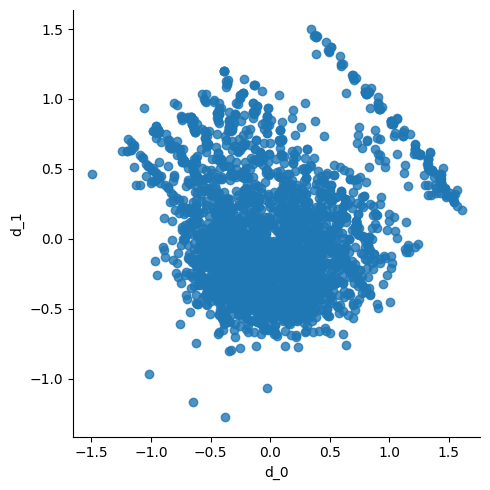

In [88]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False)

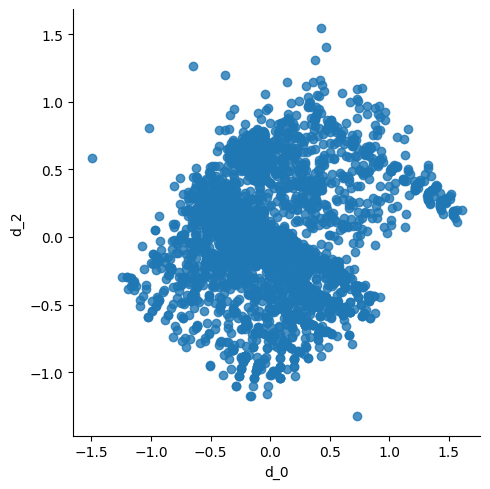

In [89]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False)

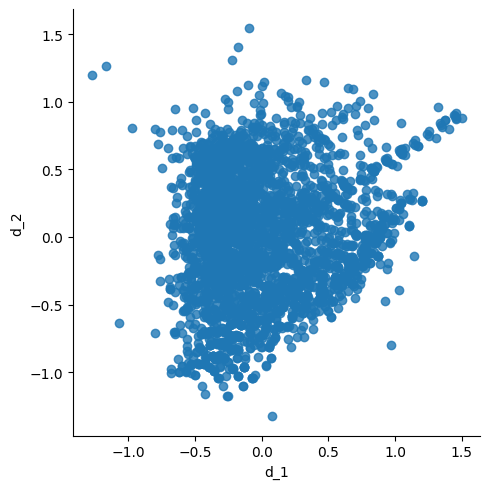

In [90]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False)

In [91]:
sc = StandardScaler()
Xsc = pd.DataFrame(sc.fit_transform(df2), columns=df2.columns)

In [92]:
#PCA
j = 3
pca = PCA(n_components=j)
Xpca = pd.DataFrame(pca.fit_transform(Xsc), columns=[f'p_{i}' for i in range(j)])
Xpca.head(2)

p_0       p_1       p_2
0 -2.078551  3.331091  9.227471
1  1.176724  1.771810 -0.116202

In [93]:
pca.explained_variance_ratio_.cumsum()

array([0.17693959, 0.31598653, 0.41974304])

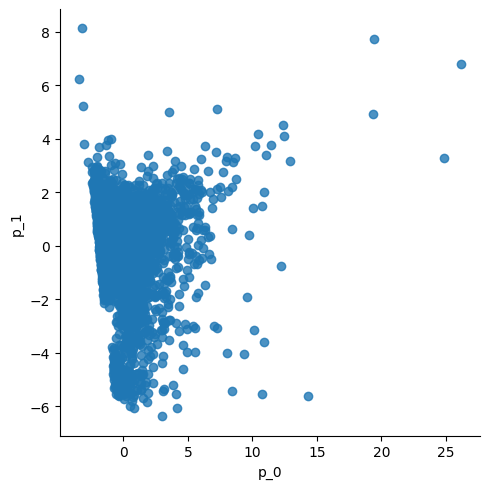

In [94]:
sns.lmplot(data=Xpca, x='p_0', y='p_1', fit_reg=False)

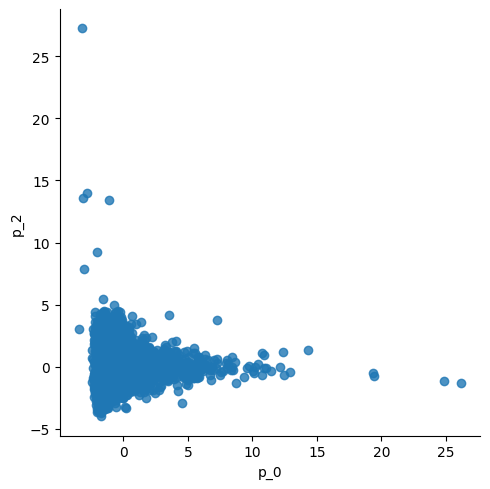

In [95]:
sns.lmplot(data=Xpca, x='p_0', y='p_2', fit_reg=False)

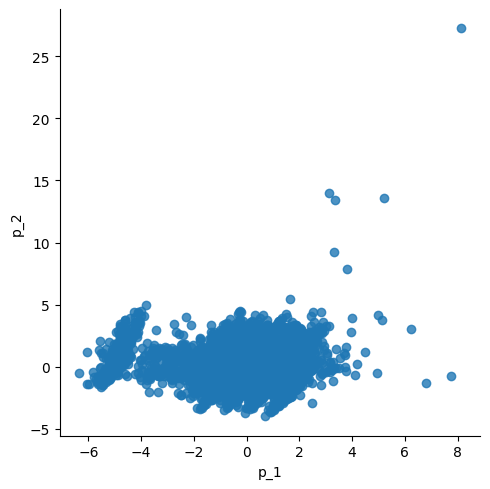

In [96]:
sns.lmplot(data=Xpca, x='p_1', y='p_2', fit_reg=False)

# Eleccion de n clusters

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

Text(0, 0.5, 'Inercia')

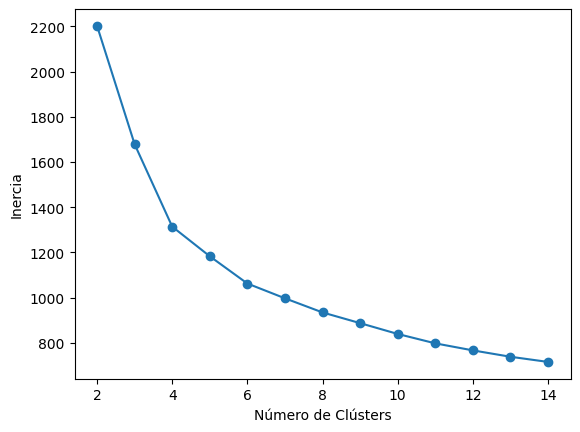

In [98]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Xmm)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

# modelacion Kmeans

In [99]:
# K-Means (k=3) por visaulización:
kmeans_mds_3 = KMeans(3)
kmeans_mds_3.fit(Xmds_sample)

predictions = kmeans_mds_3.fit_predict(Xmds_sample)
Xmds_sample['kmeans_mds_3'] = predictions


/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/carlos/Documentos/diplomado/modulo 1/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [100]:
Xmds_sample

d_0       d_1       d_2  kmeans_mds_3
0    -0.064623 -0.423265 -0.033608             2
1     0.613903 -0.517820  0.278897             0
2     0.120791 -0.335523 -0.790695             1
3    -0.114079 -0.219901  0.092473             2
4     0.725998  0.681963  1.097552             0
...        ...       ...       ...           ...
2995  0.324978 -0.404751 -0.453290             1
2996 -0.210497  0.035127 -0.611280             1
2997 -0.271929  0.626675  0.038793             2
2998 -0.117593 -0.764147  0.780076             2
2999 -0.550628 -0.405647 -0.064825             2

[3000 rows x 4 columns]

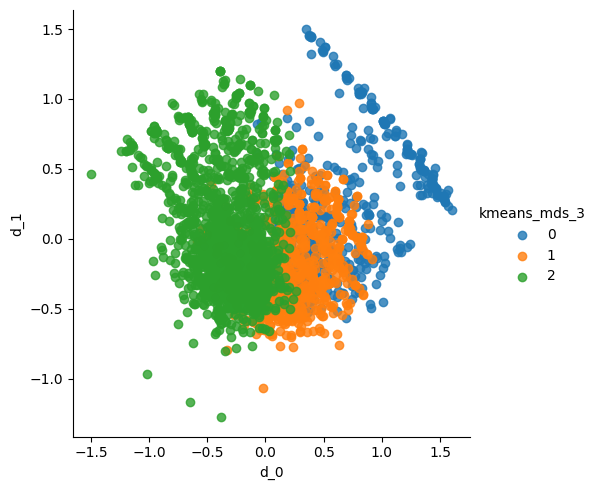

In [101]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='kmeans_mds_3')

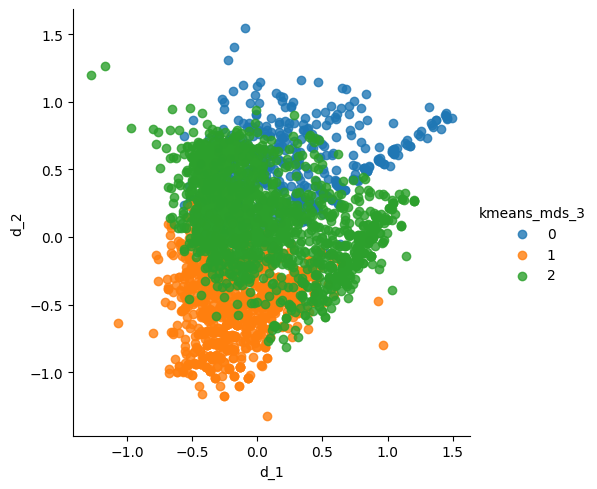

In [102]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False, hue='kmeans_mds_3')

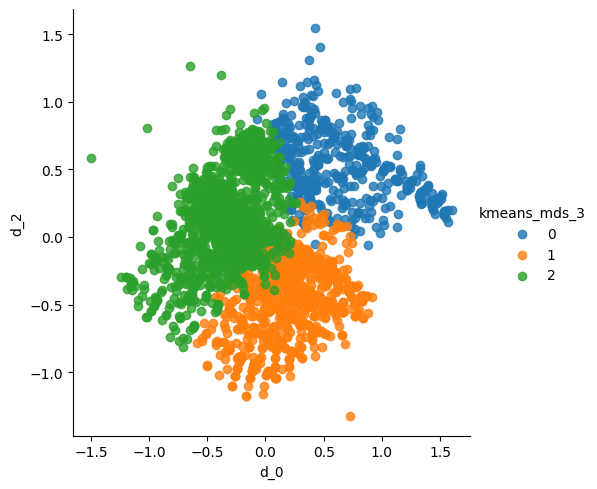

In [113]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False, hue='kmeans_mds_3')

# modelacion ward

In [104]:
#con metodo de ward
cl_ward_mds = AgglomerativeClustering(distance_threshold=None, n_clusters=3, linkage='ward')
cl_ward_mds = cl_ward_mds.fit(Xmds_sample[['d_0','d_1','d_2']])

predictions = cl_ward_mds.fit_predict(Xmds_sample[['d_0','d_1','d_2']])
Xmds_sample['cl_ward_mds'] = predictions

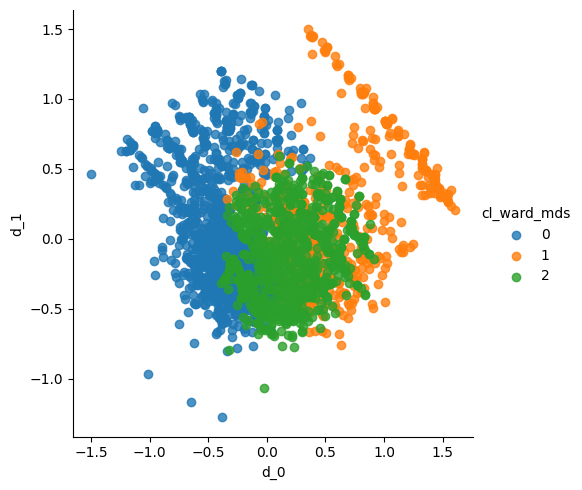

In [105]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_1', fit_reg=False, hue='cl_ward_mds')

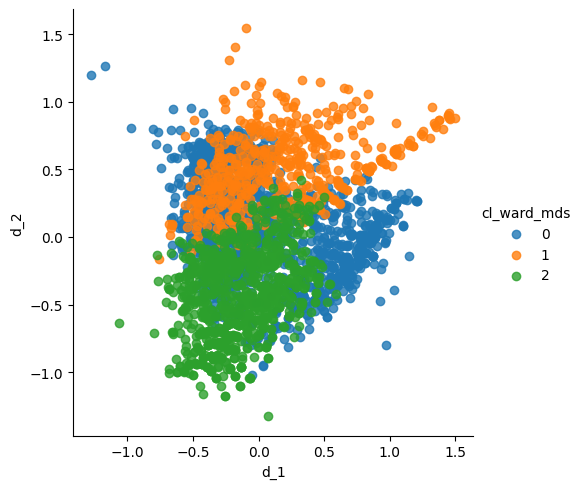

In [106]:
sns.lmplot(data=Xmds_sample, x='d_1', y='d_2', fit_reg=False, hue='cl_ward_mds')

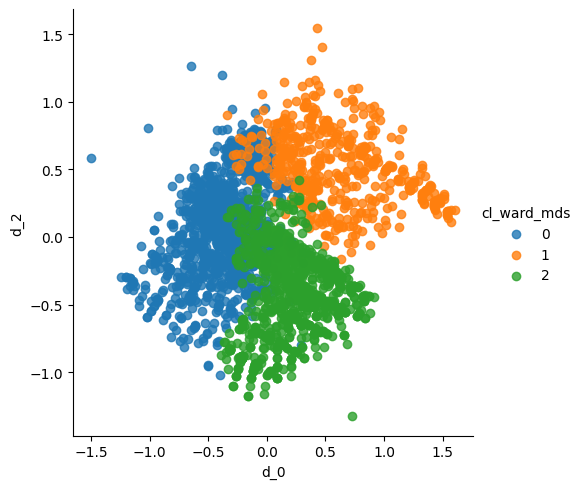

In [107]:
sns.lmplot(data=Xmds_sample, x='d_0', y='d_2', fit_reg=False, hue='cl_ward_mds')

# comparacion de resultados 

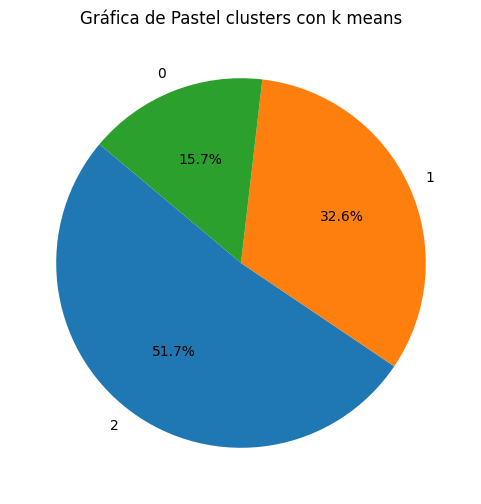

In [108]:
conteo_clusters = Xmds_sample['kmeans_mds_3'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo_clusters, labels=conteo_clusters.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfica de Pastel clusters con k means')
plt.show()

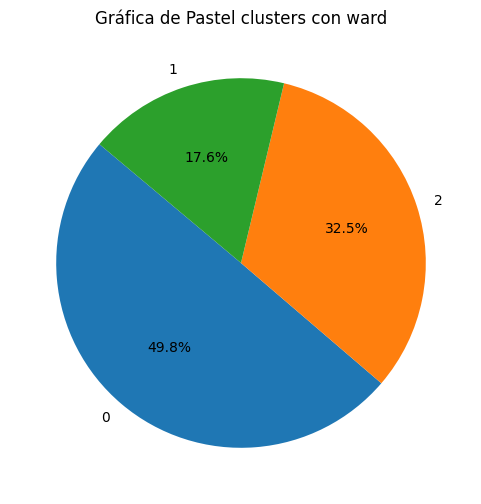

In [109]:
conteo_clusters = Xmds_sample['cl_ward_mds'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo_clusters, labels=conteo_clusters.index, autopct='%1.1f%%', startangle=140)
plt.title('Gráfica de Pastel clusters con ward')
plt.show()

# analisis de los resultados obtenidos con kmeans

In [110]:
# select k best inversa

kb=SelectKBest(k='all', score_func=f_classif)
kb.fit(Xmm_sample,Xmds_sample['kmeans_mds_3'])
importancia_caracteristicas = kb.scores_
importancia_df = pd.DataFrame({'Caracteristica': Xmm_sample.columns, 'Importancia': importancia_caracteristicas}).sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_df

Caracteristica  Importancia
0      weekend_rate  4532.591363
1         month_min  3302.593690
2          day_mean  1364.493990
3        month_mean  1358.556383
4           day_max   886.453134
5           day_min   458.103894
6    is_weekend_sum   356.997457
7          hour_min   143.404633
8         month_max   123.630663
9   InvoiceNo_count    71.564032
10    UnitPrice_sum    70.405508
11        total_sum    65.752864
12         hour_max    62.600229
13   devolucion_sum    44.335144
14        hour_mean    17.480396
15        total_min    16.035794
16        total_max    14.407422
17    UnitPrice_max     7.397443
18    Quantity_mean     4.805543
19       total_mean     3.662583
20   UnitPrice_mean     2.371003
21    UnitPrice_min     0.634700

In [111]:
ls_best=[]
for i in range(10): 
    ls_best.append(importancia_df['Caracteristica'][i])
ls_best

['weekend_rate',
 'month_min',
 'day_mean',
 'month_mean',
 'day_max',
 'day_min',
 'is_weekend_sum',
 'hour_min',
 'month_max',
 'InvoiceNo_count']

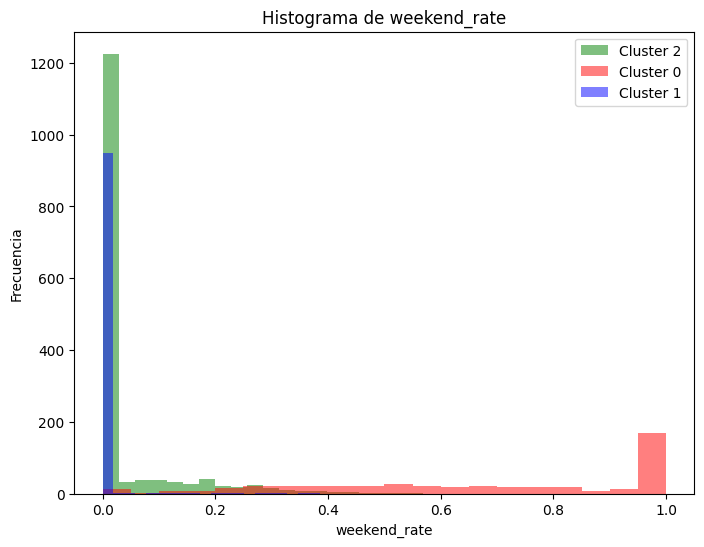

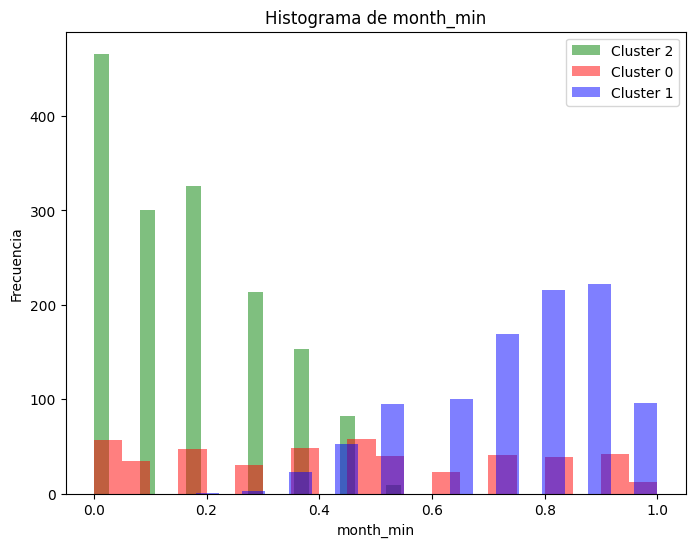

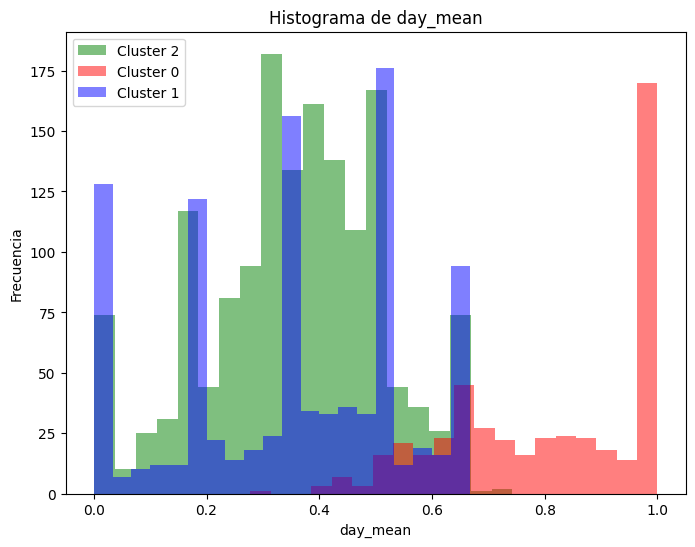

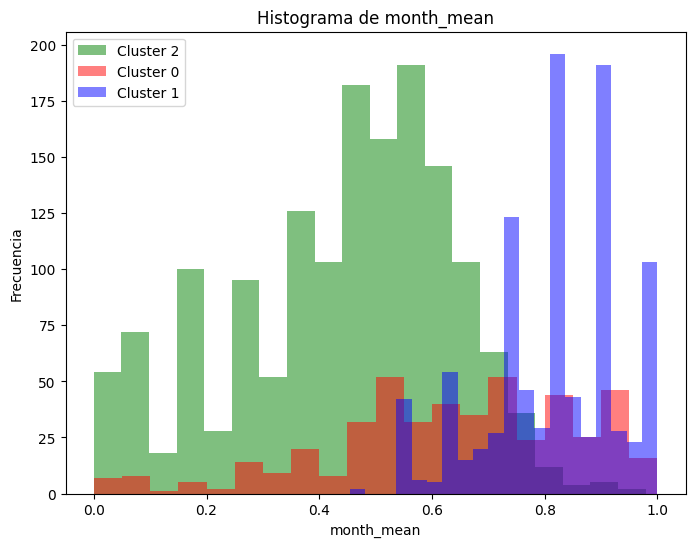

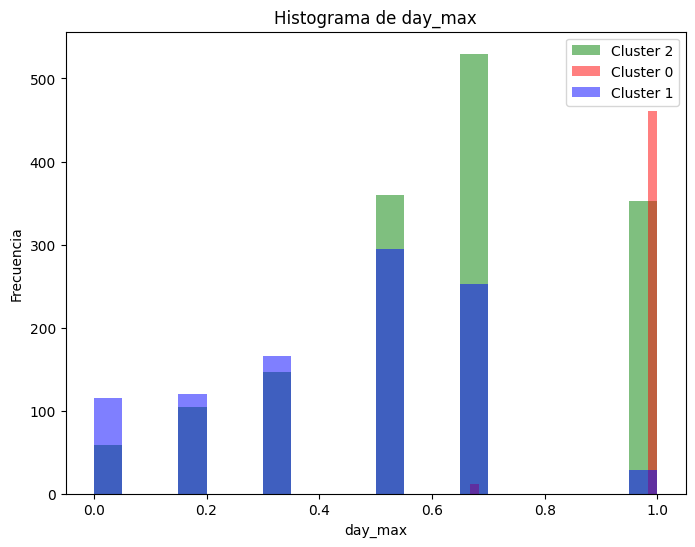

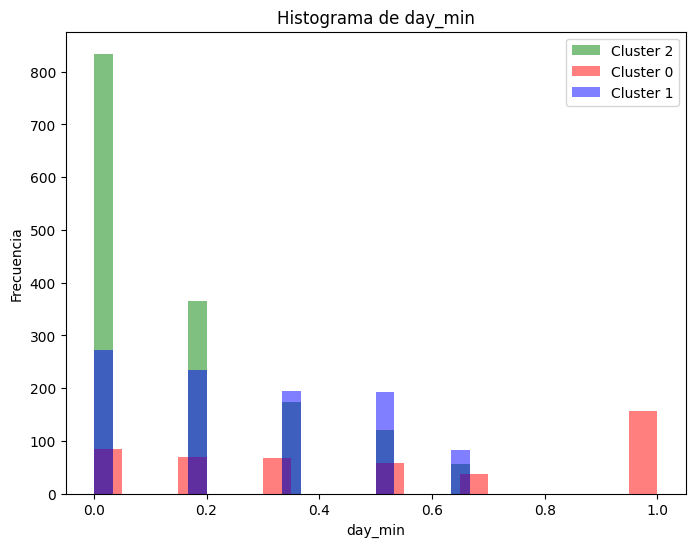

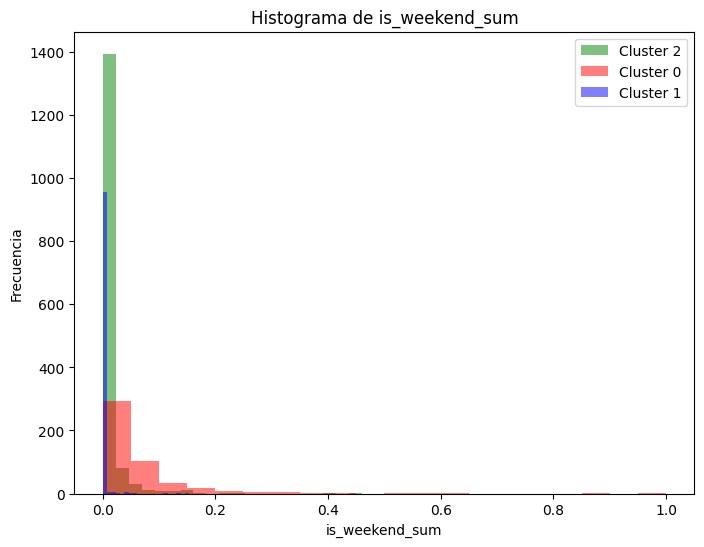

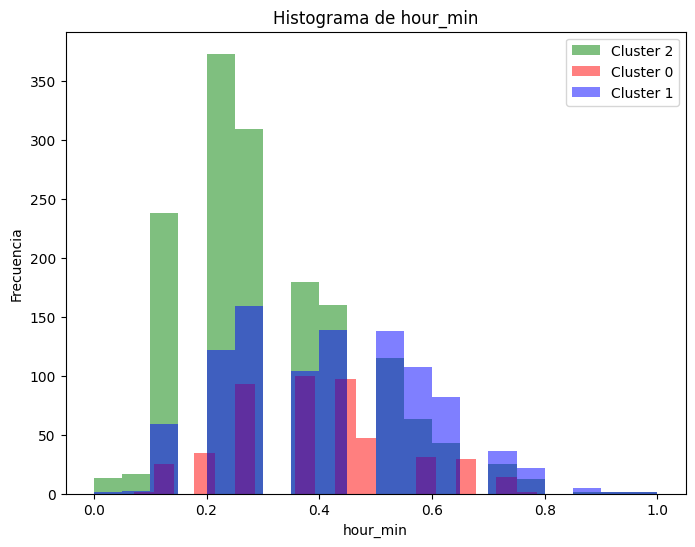

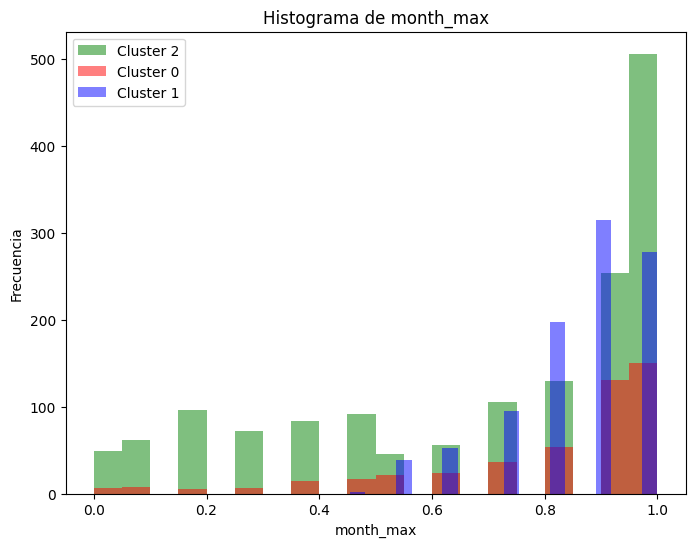

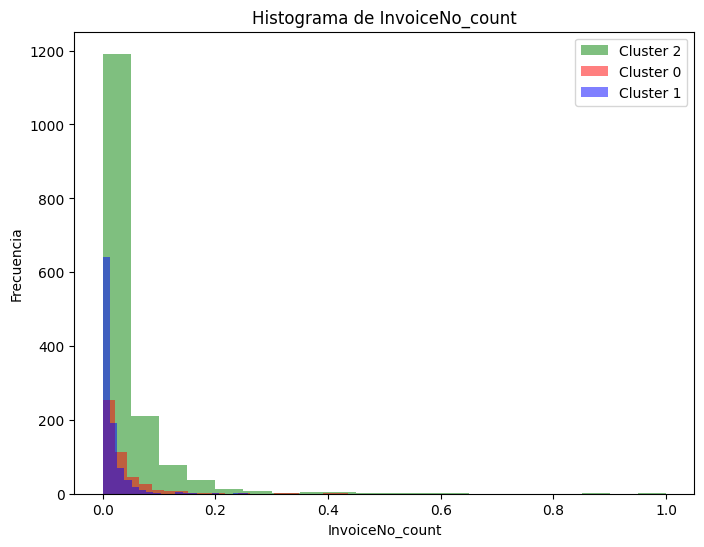

In [112]:
unique_clusters = Xmds_sample['kmeans_mds_3'].unique()

# Color mapping para kmeans_mds_3
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

# Itera a través de las variables en ls_best
for variable in ls_best:
    # Crear un nuevo histograma para la variable actual
    plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura (opcional)
    
    # Itera a través de los valores únicos de kmeans_mds_3
    for cluster_value in unique_clusters:
        # Restablece el índice del DataFrame Xmm_sample antes de la selección
        subset_data = Xmm_sample.reset_index(drop=True)[Xmds_sample['kmeans_mds_3'] == cluster_value][variable]
        
        # Crea el histograma utilizando solo un color para este conjunto de datos
        plt.hist(subset_data, bins=20, color=color_mapping[cluster_value], alpha=0.5, label=f'Cluster {cluster_value}')
    
    # Configura el título y etiquetas de los ejes
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Agrega una leyenda para identificar los clusters
    plt.legend()
    
    # Muestra la gráfica
    plt.show()